In [1]:
import pandas as pd
import wordcloud as wcld
import matplotlib.pyplot as plt
import spacy
import re


In [2]:
tw=pd.read_csv('tweets.csv', encoding= 'ISO-8859-1')
nlp=spacy.load('en_core_web_md')
tw.head()
tw.drop(['Unnamed: 0','X'],axis=1,inplace=True)
tw.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120,True,False


In [40]:
# writing a function that converts text to lower, removes punc, stop words, urls, sepcial characters

def text_clean1(tweet):
    text=re.sub('RT','',tweet)
    text=re.sub('&amp','',text)
    text=re.sub('<U\+[\w]+>','',text)
    text=re.sub('<ed>','',text)
    text=re.sub('http[s]?.+','',text)
    text=re.sub(r'[?!.;:,#@-]', '', text)
    text=text.lower()
    text=nlp(text)
    text=[tok for tok in list(text) if (tok.is_stop==False) ]
    text=[tok for tok in list(text) if (tok.is_punct==False) ]
    text=[tok.lemma_ for tok in text]
    text=" ".join(text)
    return text
text_clean1(tw['text'][1])

# tw.head()#now data frame has another column..cleaned_text

'  hemant_80 vote demonetization modi survey app'

In [41]:
tw['cleaned_tw']=tw['text'].apply(text_clean1)


In [42]:
tw[['text','cleaned_tw']]


,text,cleaned_tw
0,RT @rssurjewala: Critical question: Was PayTM ...,rssurjewala critical question paytm informed...
1,RT @Hemant_80: Did you vote on #Demonetization...,hemant_80 vote demonetization modi survey app
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",roshankar finsec rbi dy governor cbdt chair ...
3,RT @ANI_news: Gurugram (Haryana): Post office ...,ani_news gurugram haryana post office employ...
4,RT @satishacharya: Reddy Wedding! @mail_today ...,satishacharya reddy wedding mail_today carto...
...,...,...
14935,RT @saxenavishakha: Ghost of demonetization re...,saxenavishakha ghost demonetization return r...
14936,N d modi fans-d true nationalists of the count...,n d modi fansd true nationalist country stil t...
14937,RT @bharat_builder: Lol. Demonetization has fi...,bharat_builder lol demonetization fix lot li...
14938,RT @Stupidosaur: @Vidyut B team of BJP. CIA ba...,stupidosaur vidyut b team bjp cia baby cctv ...


now that tweets are cleaned..we can look at the analyse the following 
keywords, phrases, people mentioned, hashtags, urls/emails, person names, company names, sentiment, build word clouds

In [46]:
# let's join all the tweets, and we can extract info from that big corpus
clean_tw_corp=' '.join(tw['cleaned_tw'])
pd.Series(clean_tw_corp.split()).value_counts()[:10] #this is one way of getting the keywords-most 
#frequently used words (in this case top 10)

#the second way is to use package called collections
from collections import Counter
Counter(clean_tw_corp.split()).most_common(10)


[('demonetization', 14088),
 ('modi', 3075),
 ('india', 2938),
 ('pm', 2738),
 ('rich', 1588),
 ('narendra', 1566),
 ('find', 1494),
 ('implement', 1421),
 ('dear', 1411),
 ('evanspiegel', 1389)]

In [50]:
# we can get top (10) most mentions
raw_tw_corp=' '.join(tw['text'])
ment=[w for w in raw_tw_corp.split() if w.startswith('@')]
Counter(ment).most_common(10)

[('@evanspiegel', 1306),
 ('@URautelaForever:', 1273),
 ('@narendramodi', 1109),
 ('@gauravcsawant:', 541),
 ('@ModiBharosa:', 539),
 ('@DrKumarVishwas:', 350),
 ('@5Forty3:', 285),
 ('@rssurjewala:', 280),
 ('@rahulroushan:', 280),
 ('@PMOIndia', 237)]

In [52]:
# we can get top (10) most #tags
raw_tw_corp=raw_tw_corp.lower()
hashtag=[w for w in raw_tw_corp.split() if w.startswith('#')]
Counter(hashtag).most_common(10)

[('#demonetization', 6531),
 ('#demonetization.', 1062),
 ('#india', 313),
 ('#demonetization:', 264),
 ('#nitishkumar', 258),
 ('#demonetization,', 239),
 ('#demo', 180),
 ('#glvmi', 145),
 ('#blackmoney', 111),
 ('#corruptionfreeindia', 103)]

In [53]:
# we can get top (10) most URLS
links=[w for w in raw_tw_corp.split() if w.startswith('http')]
Counter(links).most_common(10)

[('https://t.co/obqrhlnsl6', 350),
 ('https://t.co/uodwxdpmmg', 254),
 ('https://t', 252),
 ('https://t.c', 187),
 ('https:/', 162),
 ('https://t.co/dgai5cf05y', 120),
 ('https://t.co/pygk8rmg7r', 114),
 ('https://t.co/tdj2a6uo5u', 95),
 ('https://t.co/9nhek63tpg', 91),
 ('https://t.co/', 90)]

In [57]:
#top (10) most look the combination of bi-grams
from nltk import ngrams
bigrm=ngrams(clean_tw_corp.split(),n=2)
Counter(bigrm).most_common(10)

[(('narendra', 'modi'), 1566),
 (('india', 'rich'), 1430),
 (('pm', 'narendra'), 1424),
 (('implement', 'demonetization'), 1408),
 (('demonetization', 'find'), 1402),
 (('rich', 'pm'), 1391),
 (('modi', 'implement'), 1385),
 (('evanspiegel', 'india'), 1371),
 (('dear', 'evanspiegel'), 1366),
 (('find', 'actually'), 1310)]

In [69]:
#top 10 named entities
# from nltk import word_tokenize,ne_chunk,pos_tag
# for txt in 

for tx in tw['text']:
    tx1=nlp(tx)
    for ent in tx1.ents:
        print(ent.text,ent.label_)
    

RT ORG
about #Demonetization MONEY
RT ORG
Demonetization MONEY
Modi ORG
RT @roshankar PERSON
FinSec ORG
RBI Dy Governor ORG
CBDT Chair ORG
Harvard ORG
Demonetization PRODUCT
Aam Aadmi PERSON
RT @ANI_news: PERSON
Gurugram PERSON
Post ORG
Reddy Wedding NORP
#demonetization # MONEY
Indias #demonetization MONEY
Blackmoney PERSON
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
RT ORG
Nationalists NORP
CorruptionFreeIndia MONEY
Demonetization PRODUCT
RT @sumitbhati2002 ORG
#demonetization MONEY
second ORDINAL
RT @Joydas: PERSON
Narendra Modi App PERSON
@Jaggesh2 Bharat PERSON
RT @Atheist_Krishna ORG
RT @Dipankar_cpiml PERSON
Modi ORG
DeMonetization PERSON
RT @roshankar PERSON
FinSec ORG
RBI Dy Governor ORG
CBDT Chair ORG
Harvard ORG
Demonetization PRODUCT
Aam Aadmi PERSON
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
RT ORG
Kerala GPE
Kerala GPE
RT @roshankar PERSON
FinSec ORG
RBI Dy Governor ORG
CBDT Chair ORG
Harvard ORG
Demonetization PRODUCT
Aam Aadmi PERS

first ORDINAL
RT @DrGPradhan PERSON
8 CARDINAL
@minimathur BIBI PERSON
first ORDINAL
RT ORG
@PMOIndia ORG
Demonetization MONEY
5 lakh MONEY
24 hrs TIME
90% PERCENT
MeraDeshBadalRaha PERSON
RT ORG
#Demonetization MONEY
RT ORG
Demonetization MONEY
@ncbn ORG
Heritage ORG
RT ORG
#Demonetization MONEY
RT @roshankar PERSON
FinSec ORG
RBI Dy Governor ORG
CBDT Chair ORG
Harvard ORG
Demonetization PRODUCT
Aam Aadmi PERSON
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
RT ORG
#Demonetization MONEY
FinSec ORG
RBI Dy Governor ORG
CBDT Chair ORG
Harvard ORG
Demonetization PRODUCT
Aam Aadmi PERSON
Modi PERSON
RT ORG
#Demonetization MONEY
RT ORG
@PMOIndia ORG
Demonetization MONEY
5 lakh MONEY
24 hrs TIME
90% PERCENT
MeraDeshBadalRaha PERSON
RT @Dipankar_cpiml PERSON
Modi ORG
DeMonetization PERSON
RT ORG
RT ORG
#Demonetization MONEY
RT @DrGPradhan PERSON
8 CARDINAL
@minimathur BIBI PERSON
first ORDINAL
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
RT @Atheist_Krishna

Acid PRODUCT
Modi PERSON
BJP PERSON
#Demonetization MONEY
Indian NORP
#India # MONEY
SouthAsia ORG
RT @RealHistoryPic ORG
Demonetization.(2016 MONEY
RT ORG
Demonetization MONEY
Modi ORG
#Demonetization MONEY
Indian NORP
#India # MONEY
SouthAsia ORG
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
RT @ModiBharosa PERSON
Demonetization MONEY
RT ORG
Doltiwal GPE
JaiChandKejriwal PERSON
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
RT @ModiBharosa PERSON
RT @Dipankar_cpiml PERSON
Modi ORG
DeMonetization PERSON
RT @Dipankar_cpiml PERSON
Modi ORG
DeMonetization PERSON
RT @DrGPradhan PERSON
8 CARDINAL
@minimathur BIBI PERSON
first ORDINAL
#Indian currency MONEY
Demonetization ORG
RT @Atheist_Krishna ORG
Demonetization ORG
55 CARDINAL
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
& PRODUCT
MLA ORG
50% PERCENT
RT @Dipankar_c

Demonetization MONEY
5 lakh MONEY
24 hrs TIME
90% PERCENT
MeraDeshBadalRaha PERSON
RT ORG
24 hours TIME
Commitment ORG
Blackmoney
 PERSON
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
RT ORG
@PMOIndia ORG
Demonetization MONEY
5 lakh MONEY
24 hrs TIME
90% PERCENT
MeraDeshBadalRaha PERSON
RT @Dipankar_cpiml PERSON
Modi ORG
DeMonetization PERSON
RT ORG
Demonetization MONEY
Modi ORG
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
U+0906><U+092A>_<U+092A><U+093E><U+0917><U+0932>_<U+0939><U+0948><U+0902 ORG
DeMonetization MONEY
RT ORG
@PMOIndia ORG
Demonetization MONEY
5 lakh MONEY
24 hrs TIME
90% PERCENT
MeraDeshBadalRaha PERSON
RT @DrGPradhan PERSON
8 CARDINAL
@minimathur BIBI PERSON
first ORDINAL
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
RT ORG
@PMOIndia ORG
Demonetization MONEY
5 lakh MONEY
24 hrs TIME
90% PERCENT
MeraDeshBadalRaha PERSON
Mamta &amp ORG
Mayawati PERSON
Modi ORG
RT ORG
#demonetization &amp;demanding MONEY
@PMOIndia ORG


RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
RT ORG
Demonetization MONEY
Modi ORG
about #NarendraModi MONEY
8 CARDINAL
@minimathur BIBI PERSON
first ORDINAL
RT @Gadgets360 PERSON
about #NarendraModi MONEY
RT ORG
Pappu & ORG
Demonetization MONEY
Modi ORG
RT ORG
Ambani ORG
Black Money ORG
Demonetization PRODUCT
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
#demonetization MONEY
about #NarendraModi MONEY
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
RT ORG
MD ItzCash PERSON
ET ORG
Demonetization PRODUCT
India GPE
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
RT ORG
Pappu & ORG
Demonetization MONEY
Modi ORG
RT ORG
9days CARDINAL
Bank ORG
14.5 Lakhs MONEY
10 Lakhs MONEY
RT @UrjitPatelRBI PERSON
#demonetization MONEY
#RBI # MONEY
Modi PERSON
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
RT @Atheist_Krishna ORG
Gandhi ji PERSON
Demonetization
 PERSON
RT @sambitswaraj PERSON
9pm #DeMonetization QUANTITY


10 days DATE
#demonetization MONEY
~Rs 5L DATE
8th DATE
Demonetization MONEY
RT ORG
Pappu & ORG
Demonetization MONEY
Modi ORG
RT ORG
RT @ModiBharosa PERSON
Demonetization MONEY
@gauravbh GPE
@sambitswaraj GPE
2000 DATE
2000 DATE
DeMonetization MONEY
#atm MONEY
#bhagalpur MONEY
minutes TIME
#NoteBan # MONEY
RT ORG
Pappu & ORG
Demonetization MONEY
Modi ORG
RT ORG
Yash PERSON
#demonetization MONEY
@Pradesh18Kan - Team ORG
RT @PIB_India PERSON
DEA Secy ORG
@DasShaktikanta PERSON
this morning TIME
RT ORG
Demonetization MONEY
Modi ORG
RT ORG
24 hours TIME
Commitment ORG
Blackmoney
 PERSON
RT ORG
Demonetization MONEY
Modi ORG
IndiaStrikesBack
 PERSON
Demonetization ORG
RT ORG
24 hours TIME
Commitment ORG
Blackmoney
 PERSON
RT ORG
Bangalore GPE
Demonetization Drive FAC
New Delhi GPE
New Delhi GPE
RT ORG
Nationalists NORP
CorruptionFreeIndia MONEY
Demonetization PRODUCT
BJP ORG
Delhi GPE
#Opposition # MONEY
# CARDINAL
RT ORG
Demonetization MONEY
Modi ORG
Delhi GPE
#Opposition # MONEY
# CARDINAL

9pm #DeMonetization QUANTITY
RT @sukanyaiyer2 PERSON
DeMonetization & ORG
2 March DATE
Demonetization MONEY
RT ORG
MUDRA ORG
R Vaidyanathan - https://t.co/P6HkkDVa3b PERSON
@upma23 @UnS PERSON
RT ORG
24 hours TIME
Commitment ORG
Blackmoney
 PERSON
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
RT ORG
Nationalists NORP
CorruptionFreeIndia MONEY
Demonetization PRODUCT
RT @pinaki_dasgupta PERSON
Airtel ORG
Mamta ORG
thousands of crores MONEY
Demonetization MONEY
RT @ModiBharosa PERSON
Demonetization MONEY
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
RT @Atheist_Krishna ORG
RT @Atheist_Krishna ORG
India GPE
RT ORG
9 CARDINAL
RT @Atheist_Krishna ORG
RT ORG
24 hours TIME
Commitment ORG
Blackmoney
 PERSON
RT ORG
MD ItzCash PERSON
ET ORG
Demonetization PRODUCT
India GPE
RT @Meena_ETVnews PERSON
Today DATE
tonight TIME
RT @Joydas: PERSON
Narendra Modi App PERSON
RT @sambitswaraj PERSON
9pm #DeMonetization QUANTITY
RT @Atheist_Krishna ORG
RT @Atheist_Krishna ORG
5,0

Consumption, Banks ORG
RT @TheOfficialSBI ORG
today DATE
33000 thousand ATMs MONEY
Smt ORG
Arundhati Bhattacharya PERSON
Demonetization PERSON
RT ORG
RT @Joydas: PERSON
Narendra Modi App PERSON
RT ORG
RT @IndiaFirst_2019 PERSON
#Demonetization MONEY
Be A Part of Nation Building WORK_OF_ART
RT ORG
MUDRA ORG
R Vaidyanathan - https://t.co/P6HkkDVa3b PERSON
@upma23 @UnS PERSON
RT @Meena_ETVnews PERSON
Today DATE
tonight TIME
RT @Demo_Kaisi EVENT
Today DATE
tonight TIME
RT @Joydas: PERSON
Narendra Modi App PERSON
RT ORG
Modiji PERSON
& ORG
Rabi ORG
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
RT @Joydas: PERSON
Narendra Modi App PERSON
RT @kavita_krishnan PERSON
#demonetization MONEY
Only #NMApp MONEY
#demonetization MONEY
India GPE
MinisterMenu ORG
100 CARDINAL
# PRODUCT
@ArvindKejriwal & ORG
Indians NORP
a Civil war EVENT
India GPE
RT ORG
about #demonetization MONEY
@PMOIndia ORG
@JhaSanjay ji PERSON
Vcoward PERSON
RT @ModiBharosa PERSON
Demonetization MONEY
RT ORG
MUDRA O

@upma23 @UnS PERSON
RT @ModiBharosa PERSON
Demonetization MONEY
RT ORG
92% PERCENT
@narendramodi ORG
#Demonetization MONEY
Modi App & ORG
RT @Joydas: PERSON
Narendra Modi App PERSON
RT ORG
Nationalists NORP
CorruptionFreeIndia MONEY
Demonetization PRODUCT
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
Demonetization MONEY
RT ORG
Demonetization MONEY
@ncbn ORG
Heritage ORG
Demonetization MONEY
India GPE
India GPE
RT ORG
92% PERCENT
@narendramodi ORG
#Demonetization MONEY
Modi App & ORG
Ceasefire Violation ORG
Mutilation ORG
only #demonetization MONEY
RT ORG
@PMOIndia 

 PERSON
RT ORG
92% PERCENT
@narendramodi ORG
#Demonetization MONEY
Modi App & ORG
RT ORG
about # MONEY
& PRODUCT
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
RT @madskak PERSON
Bypolls PERSON
#Demonetization MONEY
Bypolls ORG
Demonetizat PERSON
RT @AnandM25_TNIE PERSON
Shiva NORP
RT ORG
8.00 PM TIME
RT @ModiBharosa PERSON
RT ORG
Nat

Demonetization PRODUCT
RT ORG
Nationalists NORP
CorruptionFreeIndia MONEY
Demonetization PRODUCT
RT ORG
Gujarat GPE
#Demonetization 
 MONEY
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
RT @ModiBharosa PERSON
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
RT @ModiBharosa PERSON
Demonetization MONEY
RT @vimuktaatma ORG
one CARDINAL
#Governement ORG
RT ORG
#demonetization &amp;demanding MONEY
@PMOIndia ORG
Parliame ORG
700 Crores rupees MONEY
3 CARDINAL
Long & ORG
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
700 Crores rupees MONEY
3 CARDINAL
700 Crores rupees MONEY
3 CARDINAL
India GPE
India GPE
RT ORG
40 lakh MONEY
Kishtwar ORG
J&amp;K. ORG
Third ORDINAL
Jan Jan Ki Baat PERSON
Demonetization MONEY
@jankibaat1 
 PERSON
citizensvoice

 PERSON
RT @ModiBharosa PERSON
Demonetization MONEY
RT @YSRCParty PERSON
Chandrababu PERSON
Narendra Modi ORG
1 CARDINAL
ATM ORG
Bengaluru #BankRobbery

KeyboardInterrupt: 

In [77]:
#sentiment analysis
from textblob import TextBlob

TextBlob('hey u how are you').sentiment.polarity


senti=[sen for sen in tw['cleaned_tw'].apply(lambda x: TextBlob(x).sentiment.polarity)]

Text(0, 0.5, 'Mean Sentiment')

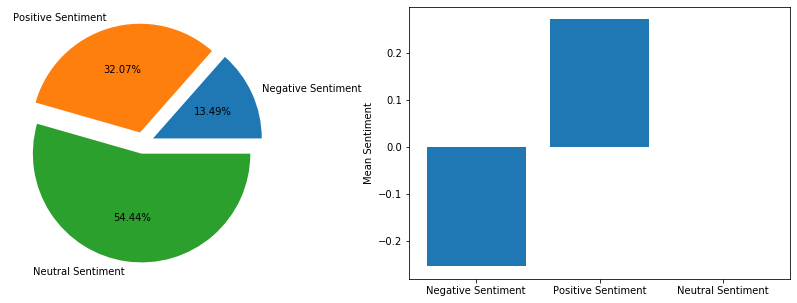

In [112]:
import numpy as np
sen_arr=np.array(senti)
sen_arr.shape
senti_percen=[len(sen_arr[sen_arr<0])/len(sen_arr)*100, 
         len(sen_arr[sen_arr>0])/len(sen_arr)*100,len(sen_arr[sen_arr==0])/len(sen_arr)*100]

senti_mean=[np.mean(sen_arr[sen_arr<0]), 
         np.mean(sen_arr[sen_arr>0]),np.mean(sen_arr[sen_arr==0])]

fig,ax=plt.subplots(1,2,figsize=(15,5))      
ax[0].pie([senti_percen[0],senti_percen[1],senti_percen[2]],explode=[0.1,0.1,0.1],
         labels=['Negative Sentiment','Positive Sentiment','Neutral Sentiment'],autopct='%1.2f%%')





ax[1].bar(['Negative Sentiment','Positive Sentiment','Neutral Sentiment'],
         [senti_mean[0],senti_mean[1],senti_mean[2]])
ax[1].set_ylabel('Mean Sentiment')
# plt.pie([senti_percen[0],senti_percen[1],senti_percen[2]],explode=[0.1,0.1,0.1],
#          labels=['Negative Sentiment','Positive Sentiment','Neutral Sentiment'])

In [104]:
senti_mean=[np.mean(sen_arr[sen_arr<0]), 
         np.mean(sen_arr[sen_arr>0]),np.mean(sen_arr[sen_arr==0])]
senti_mean

[-0.25466274421538554, 0.27074224315288287, 0.0]

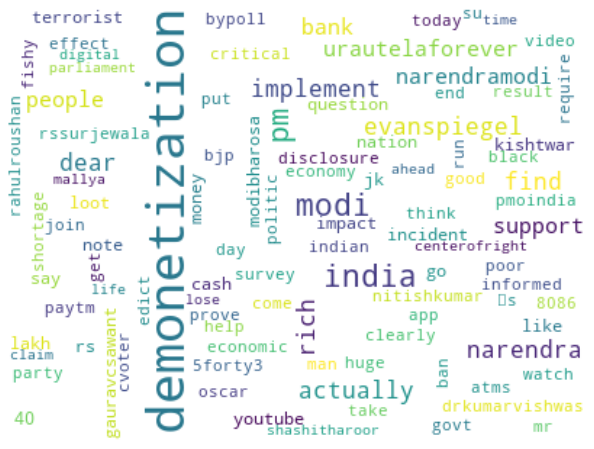

In [139]:
#building word clouds

wrd_list=[wrd for wrd in clean_tw_corp.split()]
wcl=pd.Series(wrd_list).value_counts()
wc=WordCloud(width=400, height=300, background_color='white').generate_from_frequencies(wcl[:100])
plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')#no need of axis counts
plt.show()